In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sklearn
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read spectra from different imaging days
avg_specs_day2 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day2.csv")
avg_specs_day5 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day5.csv")
avg_specs_day7 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day7.csv")
avg_specs_day9 = pd.read_csv("/content/drive/MyDrive/Master/data/spectrums/vis-nir/average_spectra_day9.csv")


In [4]:
del avg_specs_day2["image_id"]
del avg_specs_day5["image_id"]
del avg_specs_day7["image_id"]
del avg_specs_day9["image_id"]

In [5]:
avg_specs_day2["class"] = avg_specs_day2["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day5["class"] = avg_specs_day5["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day7["class"] = avg_specs_day7["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})
avg_specs_day9["class"] = avg_specs_day9["class"].replace({"clean_kontroll": "control", "clean_tork": "drought"})



In [6]:
all_specs = pd.concat([avg_specs_day2, avg_specs_day5, avg_specs_day7, avg_specs_day9])

## Day 2 after infestation

In [7]:
# Split into data matrix and target
y = avg_specs_day2["class"]
X = avg_specs_day2.drop(["class"], axis=1)

# Turn labels into integers
le = LabelEncoder()
y_int = le.fit_transform(y)
print(y_int)
print(le.classes_)

# Scale and perform LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)



[0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 0 0 1 1 2 2 3 3 4 4 2 2 3 3 4 4 0
 0 1 1 2 2 3 4 4]
['control' 'drought' 'mites_1t' 'mites_2t' 'mites_4t']


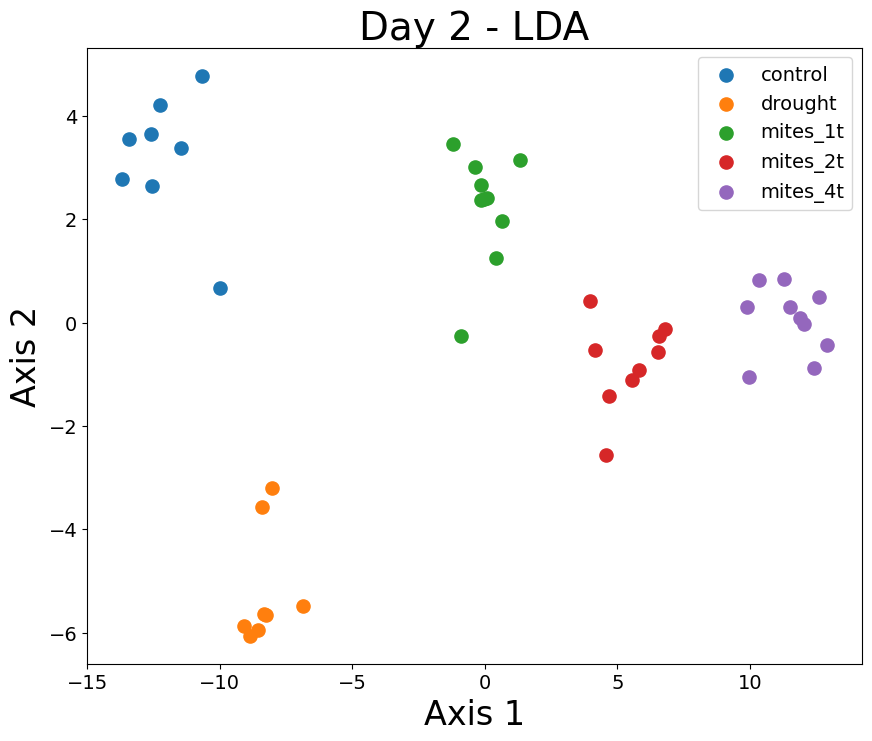

In [8]:
# Plot first two components of LDA
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 2 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day2.png", dpi=400)
plt.show()

## Day 5 after infestation

In [9]:
y = avg_specs_day5["class"]
X = avg_specs_day5.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)

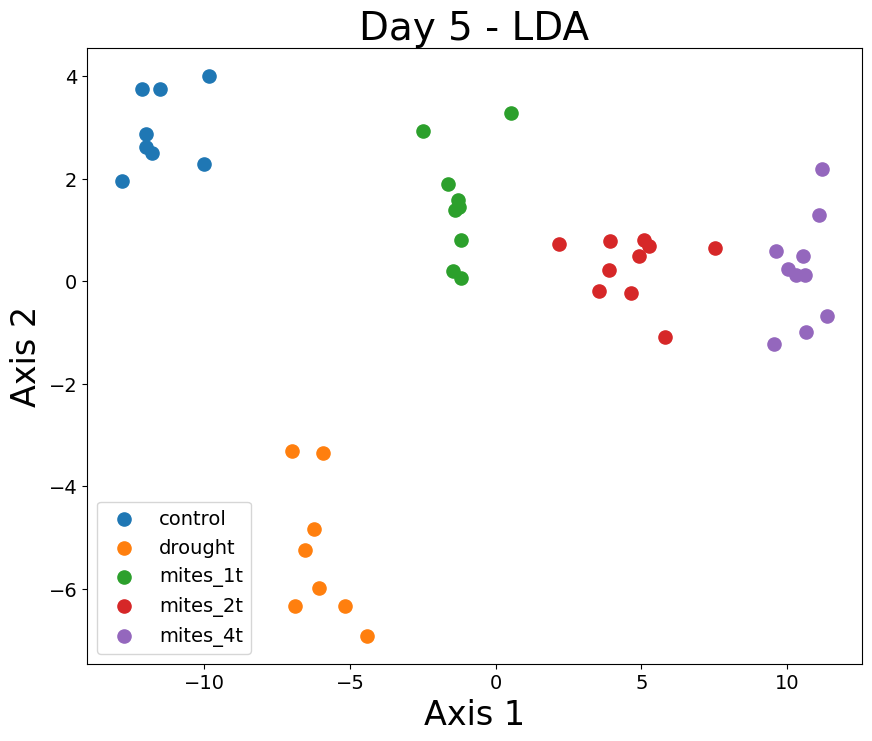

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 5 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day5.png", dpi=400)
plt.show()

## Day 7 after infestation

In [11]:
y = avg_specs_day7["class"]
X = avg_specs_day7.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_int)

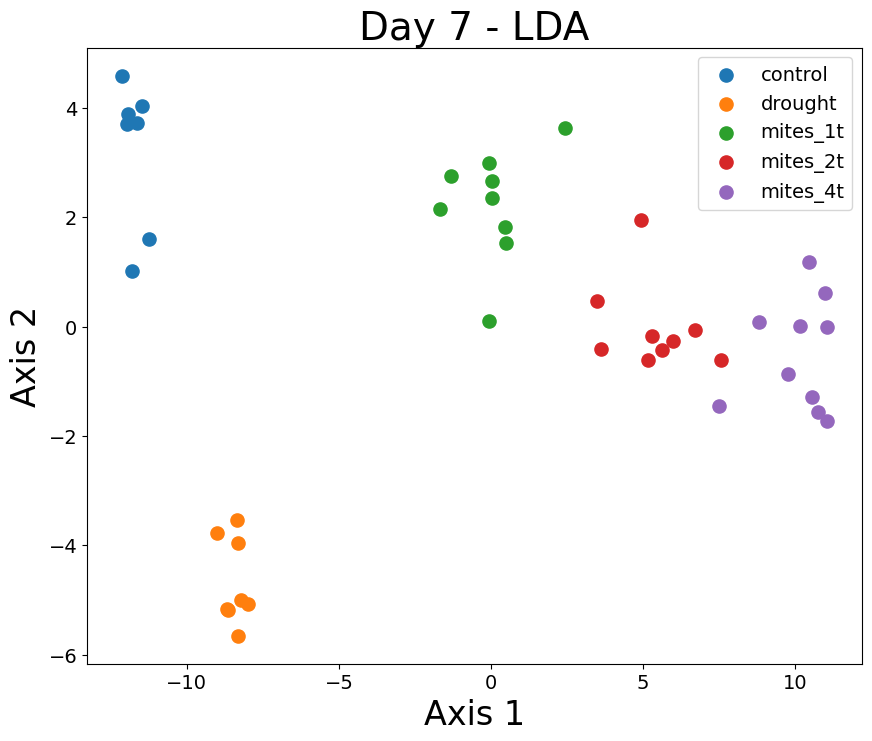

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 7 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day7.png", dpi=400)
plt.show()

## Day 9 after infestation

In [13]:
y = avg_specs_day9["class"]
X = avg_specs_day9.drop(["class"], axis=1)

le = LabelEncoder()
y_int = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_int)


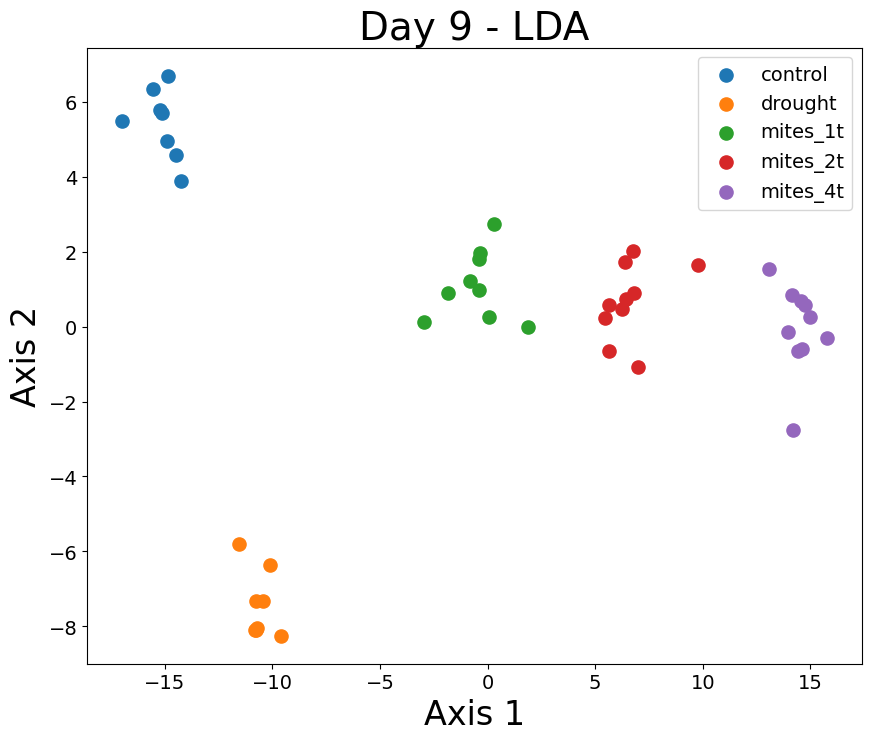

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
class_labels = np.unique(le.inverse_transform(y_int))
for class_id in np.unique(y_int):
    ax.scatter(
        X_lda[y_int == class_id, 0],
        X_lda[y_int == class_id, 1],
        label=class_labels[class_id],
        s=90  # point size
    )

ax.set_xlabel('Axis 1', fontsize=24)
ax.set_ylabel('Axis 2', fontsize=24)
ax.set_title('Day 9 - LDA', fontsize=28)
ax.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig("/content/drive/MyDrive/Master/data/plots/visnir_lda_day9.png", dpi=400)
plt.show()